In [5]:
from functions import *
import matplotlib.pyplot as plt
import pickle
from parameters_eigen import *

0.00023160103692975573
0.00030973143876086655
0.00040448683120359246


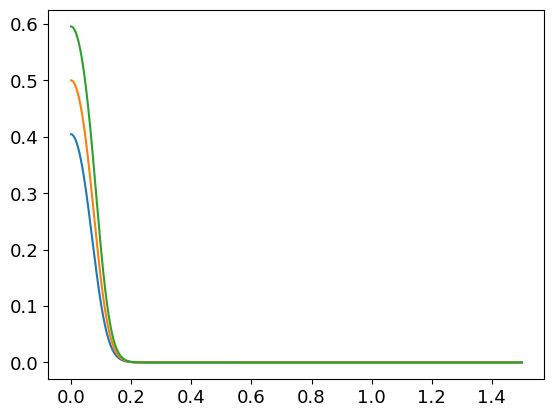

In [6]:
qlist  = np.linspace(1.5/700, 1.5, 700)
qlist = qlist**2/1.5

T = 60
n_distr = []
chem_pot_list = np.linspace(E_G-0.002,E_G+0.002,3)
for chem_pot in chem_pot_list:
    ns = equilibrium_occupation(qlist, chem_pot, T, E_G, mu)
    n_distr.append(ns)
    plt.plot(qlist, ns, label = chem_pot-E_G)
    N = 0
    for i in range(len(qlist)):
            dQ = get_dQ(i,qlist)
            N += ns[i]* qlist[i] * dQ /(2*np.pi)
    print(N)

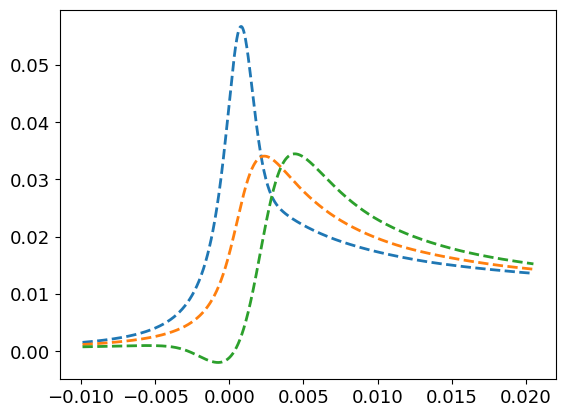

In [7]:
spectra = []
for dchem in ['-0.002', '0', '+0.002']:   
    with open('results/N0_occupations/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_d_cv=0.87_n_wells1_z2500045.0_reflectionsFalse_quadratic_grid_chem_potdiff={}_T=60_absorption.pickle'.format(dchem), 'rb') as input_file:
        spec = pickle.load(input_file) 
        spectra.append(spec)
    plt.plot(omega_list, spec, '--', linewidth = 2)



In [8]:
import matplotlib as mpl
import colorsys
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgb
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

# Funktion zum Reduzieren der Sättigung
def desaturate_color(color, factor=0.9):
    # Konvertiere die Farbe in den RGB-Farbraum
    r, g, b = to_rgb(color)
    # Konvertiere die Farbe in den HSV-Farbraum
    h, s, v = colorsys.rgb_to_hsv(r, g, b)
    # Reduziere die Sättigung
    s *= factor
    # Konvertiere die Farbe zurück in den RGB-Farbraum
    desaturated_color = colorsys.hsv_to_rgb(h, s, v)
    return desaturated_color

jet_map = plt.get_cmap('plasma')
new_colors = jet_map(np.linspace(0, 1, 5))
new_color =[desaturate_color(new_colors[i]) for i in range(5)]
SMALL_SIZE = 13
MEDIUM_SIZE = 13
BIGGER_SIZE = 14
LW = 2

lowred = desaturate_color('red')
lowblue = desaturate_color('blue')

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

linestyles =['-',':', '--','-.']#, ''] 
dashlist = [(5,2),(2,2),(1,2,4,2),(1,1), (2,5), (1,2,2,2), (3,2,2)]
#colorlist =['firebrick', 'green'] 
mpl.rcParams['mathtext.default'] = 'regular'

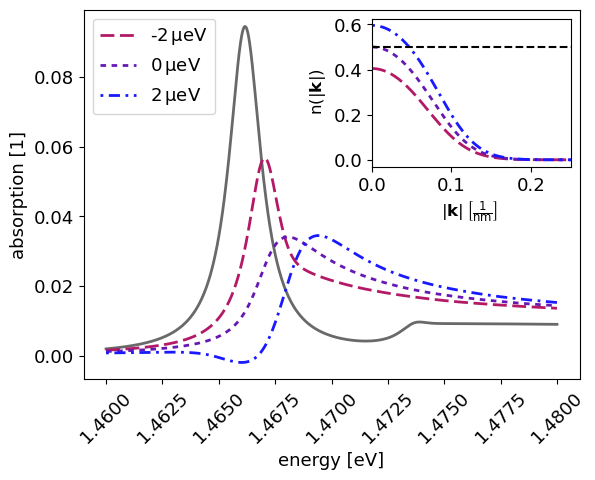

In [9]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax = plt.subplots()
pots = [-2, 0, 2]
E_G = 1.475
energyresolution = 1000
E_start = -0.015 + 0.012903883497007542 * hbar
E_stop = 0.005 + 0.012903883497007542 * hbar
omega_list = np.linspace(E_start/hbar,E_stop/hbar,energyresolution)
with open(r"results/N0_occupations/Qdim=700_Qmax=1.5_power0.000001_true_E_conversion_pf_corr=0.15_n_wells1_z2500012.0_reflectionsFalse_quadratic_grid_absorption.pickle", 'rb') as output_file:
    absorption_probe = pickle.load(output_file)

ax.plot(hbar*(omega_list + E_G/hbar- 0.012903883497007542), absorption_probe, label = r'', linewidth = LW, linestyle = '-', color = 'dimgrey')
for i in range(len(spectra)):
    ax.plot(hbar*(omega_list + E_G/hbar- 0.012903883497007542), spectra[i], label = str(pots[i])+r'$\,\mu$eV', linewidth = LW, linestyle = '--', dashes = dashlist[i], color = colorFader(lowred,lowblue,(i+1)/(len(spectra))))


#ax.fill_between(hbar*(omega_list+ E_G/hbar- 0.012903883497007542), 0.1*np.abs(fouriertrafo(gauss_pulse(tlist, E_0 = 0.5, sigma = sigma_pump, t_center = t_pump,detuning = 0),omega_list, tlist)),color = 'lightgray', label = 'pump')
#plt.xlim(1.461, 1.48)
plt.xticks( rotation = 45)
plt.xlabel('energy [eV]')
plt.ylabel('absorption [1]')
plt.legend(loc = 'upper left')

# Inset-Diagramm

ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper right')
for i in range(len(n_distr)):
    ax_inset.plot(qlist[:400] , np.real(n_distr[i][:400] ), label = str(pots[i])+' meV',  linewidth = LW, linestyle = '--', dashes = dashlist[i], color = colorFader(lowred,lowblue,(i+1)/(len(spectra))))
ax_inset.hlines(0.5, 0.0, 0.25, linestyle = 'dashed', color = 'black')
plt.xlim(0, 0.25)
plt.xlabel(r'$|\mathbf{k}|\, \left[ \frac{1}{nm}\right]   $ ', fontsize = 12)
plt.ylabel(r' $n\left(|\mathbf{k}|\right) $ ' , fontsize = 12)
# Textbox hinzufügen
textstr = r"$\tau = 4\,ps$ "
props = dict(facecolor='white', alpha=0.5)
#ax.text(0.81, 0.1, textstr, transform=ax.transAxes, fontsize=14,
 #       verticalalignment='top', bbox=props)
#plt.show()
#plt.savefig('results/dt={}_Qdim={}_absorption_Efield_dependence_with_inset_lineargrid_withdecay.pdf'.format(delta_t,Qdim),bbox_inches='tight')
#plt.savefig('results/gain/dt=4000.0_Qdim={}_absorption_Efield_dependence_with_inset_squaregrid_withdecay_test.pdf'.format(Qdim),bbox_inches='tight')
plt.savefig('results/N0_occupations/occupation_gain.pdf',bbox_inches='tight')


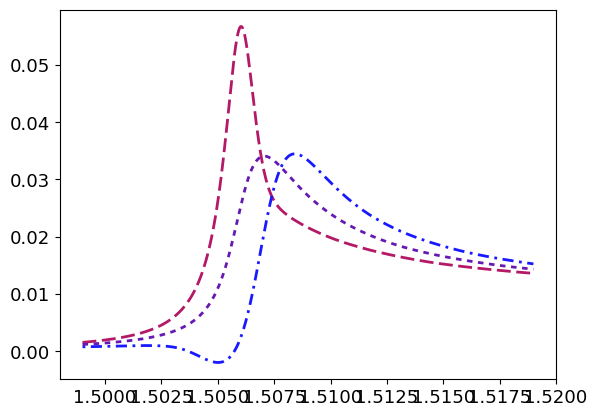

In [37]:

for i in range(len(spectra)):
    plt.plot(hbar*(omega_list + E_G/hbar- 0.012903883497007542), spectra[i], label = str(pots[i])+'$\,meV', linewidth = LW, linestyle = '--', dashes = dashlist[i], color = colorFader(lowred,lowblue,(i+1)/(len(spectra))))


#ax.fill_between(hbar*(omega_list+ E_G/hbar- 0.012903883497007542), 0.1*np.abs(fouriertrafo(gauss_pulse(tlist, E_0 = 0.5, sigma = sigma_pump, t_center = t_pump,detuning = 0),omega_list, tlist)),color = 'lightgray', label = 'pump')
